<a href="https://colab.research.google.com/github/amann-03/PyTorch_Implementations/blob/main/Pytorch_WorkFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Pytorch end-to-end Workflow

1. Prepare and load data
2. Build model
3. fitting the model to data
4. making predictions and evaluating a model(inference)
5. Saving and loading a model
6. Putting it all together

In [2]:
import torch
from torch import nn
# nn contains all Pytorch's building blocks for neural networks
import matplotlib.pyplot as plt
torch.__version__

'2.2.1+cu121'

**Data preparing and Loading**

Data can be almost anything:

1. Excel sheet
2. Images of any kind
3. Videos
4. Audio like songs or podcasts
5. DNA, Text


**Let's use linear regression to make a straight line formula with known parameters.**

In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1) # data points
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X),len(y)

(50, 50)

### Splitting the data into training and testing sets.
**Generalization is the ability of machine learning model to perform well on data it hasn't seen before**

In [5]:
# Create a train/test split
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize the data?
This is where data explorer motto comes in!

"Visualize,Visualize and Visualize.."

**MATPLOTLIB**

In [6]:
def plot_predictions(train_data = X_train,
                     train_label = y_train,
                     test_data = X_test,
                     test_label = y_test,
                     predictions = None
                     ):
  """Plots training data, test data and compares predictions"""
  plt.figure(figsize=(10,7))

  # plot training data in blue
  plt.scatter(train_data,train_label,c="b",s=6,label="Training data")

  # plot testing data in green
  plt.scatter(test_data,test_label,c="g",s=6,label="Testing data")

  # c is color of data point ans s is size of that datapoint
  if predictions is not None:
    # plot predictions in red
    plt.scatter(test_data,predictions,c="r",s=6 ,label="Predictions")

  # Show the legend
  plt.legend(prop={"size":14})


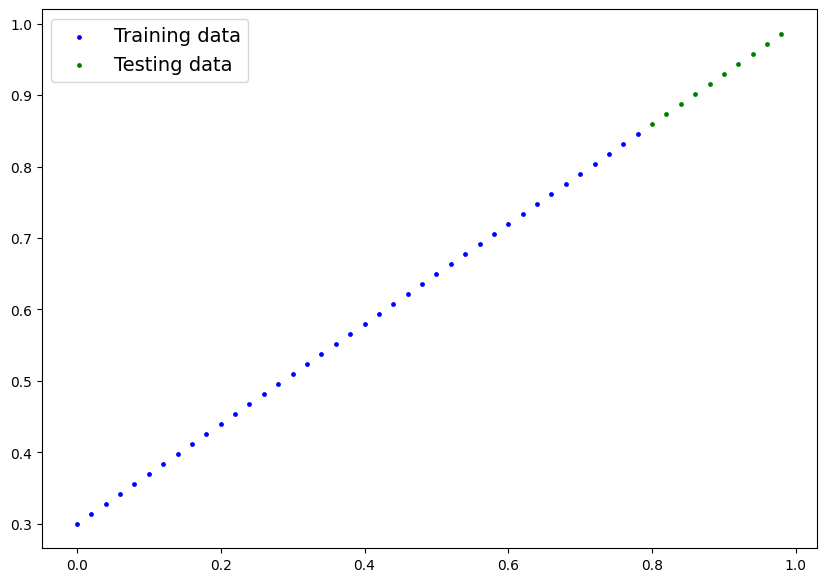

In [7]:
plot_predictions()

### Build Model
My First Pytorch Model!!

**What our model does:**
1. Start with random values of parameters(here, weights and biases)
2. Look at training data and adjust the random values to better represent the data in comparison with the ideal values

**How does it so?**
1. Gradient Descent
2. BackPropogation

In [8]:
# create linear regression model class
# Almost everthing(every model) in Pytorch inherits from nn.Module
# nn.Module is the base class of all neural network modules
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()

    # Initialise model parameters
    self.weights = nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float))

    self.bias = nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float))

    # requies_gard = true, is neccesary gor GRADIENT DESCENT algorithm
    # to update the parameters and for BACKPROPOGATION

    # Forward method to define the computation in the model
  def forward(self,x:torch.Tensor) -> torch.Tensor: # "x" is input data in tensor format
    return self.weights * x + self.bias  # linear regression formula


### PyTorch model building essentials

1. torch.nn -> conatains all the building blocks for neural networks(computational graphs)
2. torch.nn.Parameter -> what Parameters should our model try and learn, often a Pytorch layer from torch.nn will set these for us
3. torch.optim -> this is where optimizers live, they will help with gradient descent
4. def forward() -> All nn.Module subclasses require to ovverwrite this method, as it defines what happens in forward computation

In [9]:
# Checking the contents of our PyTorch model
# Create a random seed for random values of our parameters
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
# see the parametrs with names
model_0.state_dict()
# gives a dictionary of parameters with names and values

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making Prediction using torch.inference_mode()

To check our model's predictive power , let's see gow it predicts y_test based on x_test

When we pass the data to our model, it's going to run through the forward() method

In [11]:
# make predictions with model
# with inference mode, it runs faster not keeping the updates of gradient descent function
with torch.inference_mode():
  y_preds = model_0(X_test)

# same with torch.no_grad() method
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

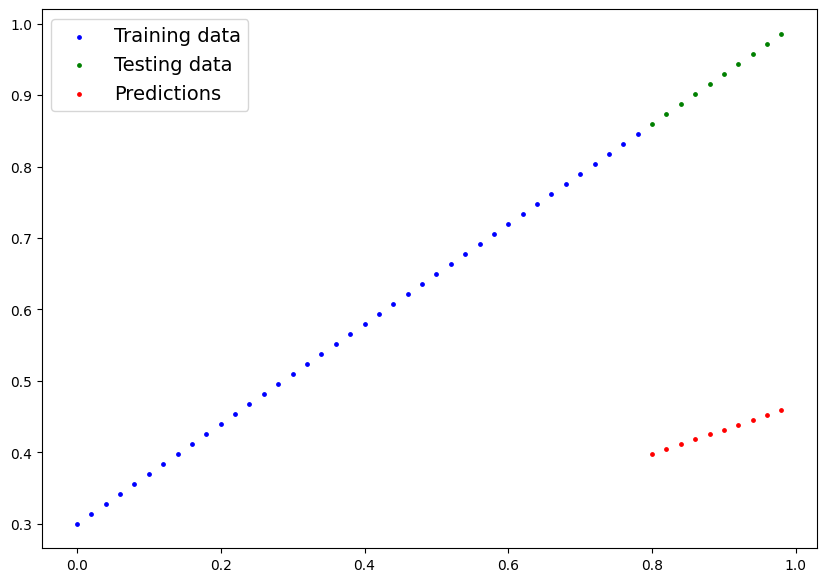

In [12]:
plot_predictions(predictions = y_preds)
# not even close to y_test

### Train Model
The whole idea of training is for a model to move from some 'unknown parameters'(may be random) to some 'known' parameters

One Way to measure how poor our model predictions is to use a loss function
(LOWER IS BETTER)
* Note: May be called as cost function

Optimizer: Takes into account the loss of model and adjusts the model's parameters(e.g. weights and biases)

In [13]:
# Setup a loss Function
loss_fn = nn.L1Loss()

# Setup an optimizer Function
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)
# lr : learning rate is possibly the most important hyperparameter

### Building a Training and Testing loop in PyTorch

**What loss function and optimizer to use?**
1. It's problem specific and it comes with experience.
2. For regression problems, loss function like nn.L1Loss() and optimizer like torch.optim.SGD() would suffice.
3. But for classification like problem, we would be likely to use nn.BCELoss()(Binary cross entopr loss)


**Things needed in training loop :**
1. Loop thriugh the data
2. Forward pass(Forward propogation)
3. Calculate the loss
4. Optimizer zero grad
5. Loss backward - to calculate the gradients of each parameter wrt our current loss(Backward propogation)
6. Optimizer step  - use the optimizer to reduce the losss by adjusting the model parameters

In [14]:
torch.manual_seed(42)

# An epoch is onle loop through data
epochs = 1 # hyperparameter

for epoch in range(epochs):
  # set model to training mode
  model_0.train() # train mode sets all parameters that requires gradients to require gradients

  # Forward pass
  y_pred = model_0(X_train)
  # Calculate loss
  loss = loss_fn(y_pred,y_train)
  # Optimizer zero grad
  optimizer.zero_grad()
  # Perform Backpropogation
  loss.backward()
  # Step the optimizer(perform gradient descent)
  optimizer.step()
  # by-default how optimizer changes will accumulate throught the loop so.. we have to zero them all

  model_0.eval() # turns off graient tracking



In [15]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])

In [16]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

# can also use torch.no_grad() for closing all the gradient descent function like inference_mode

In [18]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.4113],
        [0.4181],
        [0.4249],
        [0.4317],
        [0.4385],
        [0.4453],
        [0.4522],
        [0.4590],
        [0.4658],
        [0.4726]])


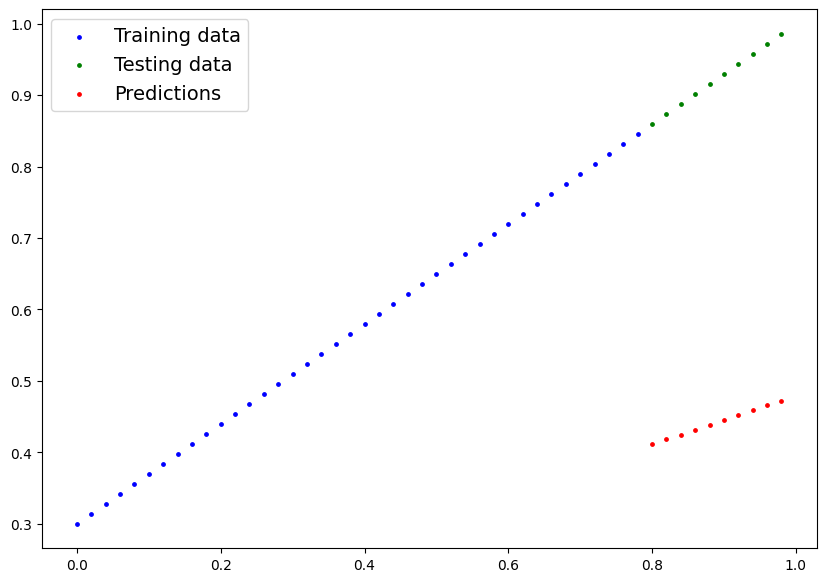

In [19]:
plot_predictions(predictions=y_preds)

In [20]:
y_test - y_preds

tensor([[0.4487],
        [0.4559],
        [0.4631],
        [0.4703],
        [0.4775],
        [0.4847],
        [0.4918],
        [0.4990],
        [0.5062],
        [0.5134]])

###PyTorch Testing loop


In [22]:
torch.manual_seed(42)

# An epoch is onle loop through data
epochs = 100 # hyperparameter

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
  # set model to training mode
  model_0.train() # train mode sets all parameters that requires gradients to require gradients

  # Forward pass
  y_pred = model_0(X_train)
  # Calculate loss
  loss = loss_fn(y_pred,y_train)
  # Optimizer zero grad
  optimizer.zero_grad()
  # Perform Backpropogation
  loss.backward()
  # Step the optimizer(perform gradient descent)
  optimizer.step()
  # by-default how optimizer changes will accumulate throught the loop so.. we have to zero them all

  model_0.eval() # turns off graient tracking

  with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss}")

Epoch: 0 | MAE Train Loss: 0.28983935713768005 | MAE Test Loss: 0.4541231691837311
Epoch: 10 | MAE Train Loss: 0.1746293306350708 | MAE Test Loss: 0.3194132149219513
Epoch: 20 | MAE Train Loss: 0.07638873159885406 | MAE Test Loss: 0.19773726165294647
Epoch: 30 | MAE Train Loss: 0.05069301277399063 | MAE Test Loss: 0.13647659122943878
Epoch: 40 | MAE Train Loss: 0.04463795945048332 | MAE Test Loss: 0.1100495308637619
Epoch: 50 | MAE Train Loss: 0.04098063334822655 | MAE Test Loss: 0.09699545800685883
Epoch: 60 | MAE Train Loss: 0.0375034399330616 | MAE Test Loss: 0.08666229248046875
Epoch: 70 | MAE Train Loss: 0.03407188132405281 | MAE Test Loss: 0.07907666265964508
Epoch: 80 | MAE Train Loss: 0.030638623982667923 | MAE Test Loss: 0.07080408930778503
Epoch: 90 | MAE Train Loss: 0.027199819684028625 | MAE Test Loss: 0.06253156810998917


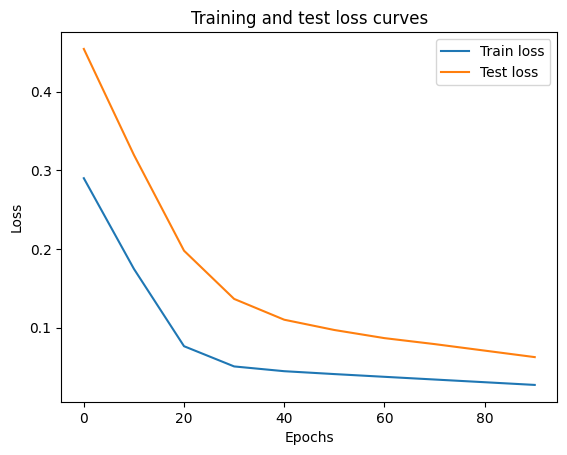

In [23]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [24]:
# getting the model's learned parameters

print(model_0.state_dict())
print(f"wieghts: {weight}, bias: {bias}")

OrderedDict([('weights', tensor([0.5818])), ('bias', tensor([0.3498]))])
wieghts: 0.7, bias: 0.3


**Making Predictions with a trained PyTorch model(inference)**

In [25]:
model_0.eval()

with torch.inference_mode():
  # model_0.to(device)
  # X_test = X_test.to(device)
  y_preds = model_0(X_test)
y_preds

tensor([[0.8153],
        [0.8269],
        [0.8385],
        [0.8502],
        [0.8618],
        [0.8735],
        [0.8851],
        [0.8967],
        [0.9084],
        [0.9200]])

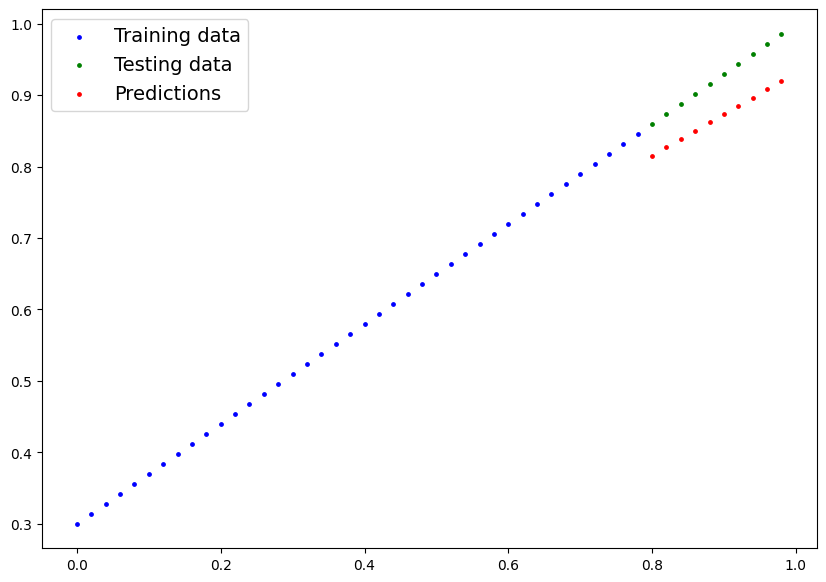

In [26]:
plot_predictions(predictions=y_preds)

**Saving a PyTorch model's state_dict()**

In [27]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


**Load the saved PyTorch model's state_dict()**

In [28]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

**Instantiating a new instance of our saved model**

In [29]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [30]:
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model

In [31]:
# Compare previous model predictions with loaded model predictions (these should be the same)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])